# **Laptop Price Prediction**

## Business Problem:

To predict the Price of a laptop based on a dataset of 1300 laptops and their specifications

## Machine Learning Problem:
This is a Regression problem, since it has to do with predicting a numerical feature (Price) from other features (laptop specifications).

## Performance Metrics:
Every model's performance will be analysed on the basis of the following metrics used for Regression models:

1. R^2 Score: For determining the best fit model
2. RMSE (Root Mean Squared Error)
3. MAE (Mean Absolute Error)
4. MSE (Mean Squared Error)

*Note: These are mentioned in order of importance.*

****Disclaimer: Use Google Colab for accessing this file.***

# Basic Reads

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the CSV dataset and displaying the head of the dataset
df = pd.read_csv("/content/drive/MyDrive/laptop.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# Displaying the column-names of the dataset
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [ ]:
# Examining the shape of the dataset
df.shape

(1303, 13)

In [ ]:
# Creating a copy of the raw data just in case we need it for the future
df_raw = df.copy()

# Data Cleaning

In [ ]:
# Examining the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# Exploring the null values in the dataset
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
# Exploring the duplicated values in the dataset
df.duplicated().sum()

0

<Axes: >

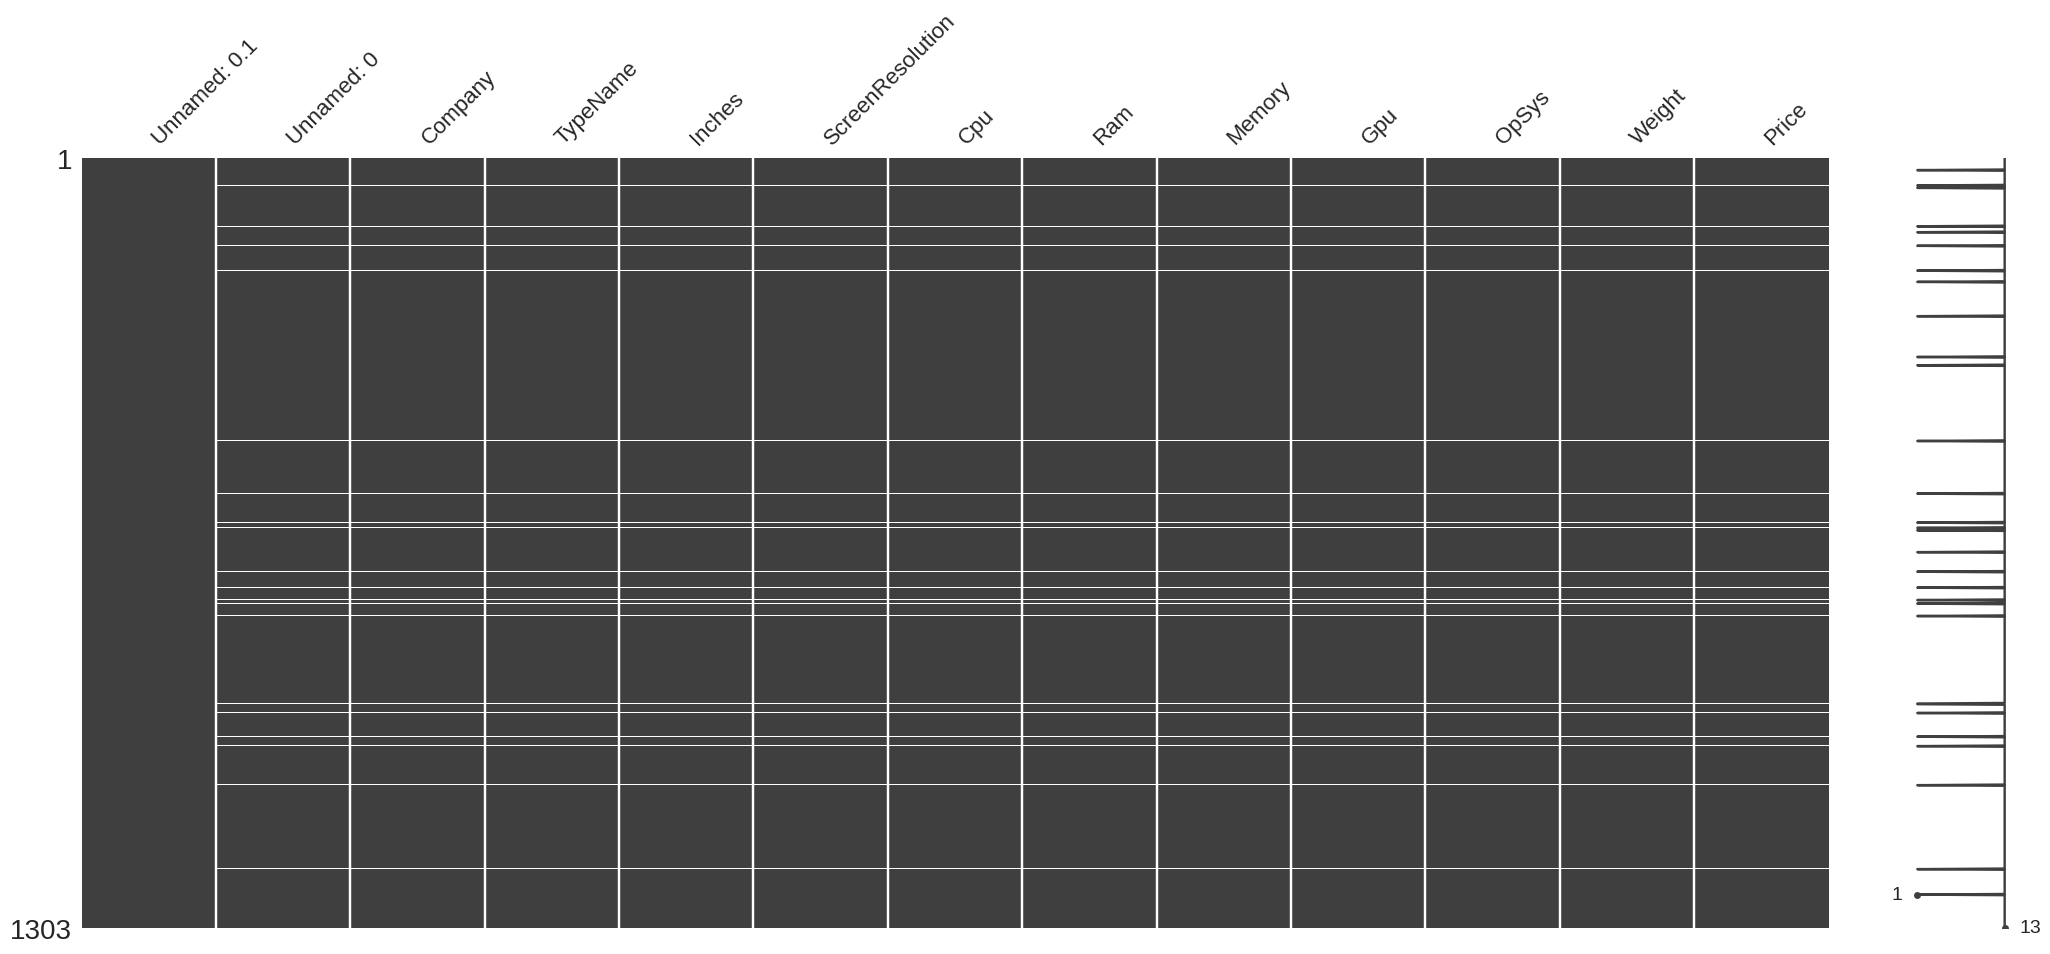

In [ ]:
# Let's further explore these null values in a matrix using missingno library

# Importing missingno library
import missingno as msno

# Creating a matrix plot to explore the missing data visually to check patterns
msno.matrix(df)

It appears that these are entire blank rows (30 rows) of missing data. Therefore these can be easily dropped from the dataset.

In [ ]:
# First, lets drop the two redundant columns - 'Unnamed: 0.1', 'Unnamed: 0'

df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# Displaying the head of the dataset
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# Now we will drop the blank rows in the dataset
df = df.dropna(how="all")

# Displaying the null values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

After dropping the null values and redundant columns as above, we will look at other features of the dataset and clean them.

In [ ]:
df.head(1273)  # Displaying the head of the dataset

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


As preliminary cleaning, let's clean out the "Ram" and "Weight" column to make them integer type

In [ ]:
df.shape

(1273, 11)

In [ ]:
# Removing the "GB" in the Ram column
df["Ram"] = df["Ram"].str.replace("GB","")

In [ ]:
# Removing the "kg" tag from the Weight column
df["Weight"] = df["Weight"].str.replace("kg","")

# Converting this to numeric type and coercing "NaN" on any values that are not numeric
df["Weight"] = pd.to_numeric(df["Weight"], errors="coerce")
df["Ram"] = pd.to_numeric(df["Ram"], errors="coerce")

# Displaying the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 119.3+ KB


In [ ]:
# We realised during further EDA and Feature Engineering section (below) that there are "?"  in certain columns like "Inches", Memory too.
# We will replace all "?" in the dataset with "NaN" coerced
df.replace("?",np.nan,inplace=True)

In [ ]:
# Displaying if there are any null values
df.isnull().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              1
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

There is a null value in the "Weight" column which we will deal with by imputing through MICE or KNN imputation, once encoding has been done. However, there are lots of other things to handle in EDA, so we will come back to the missing value columns at a later stage when we are ready to encode the dataset by creating a pipeline of steps to be completed

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 119.3+ KB


In [ ]:
# Converting the Inches datatype to float

df["Inches"] = df["Inches"].astype(float)

# EDA and Feature Engineering

<Axes: xlabel='Price', ylabel='Density'>

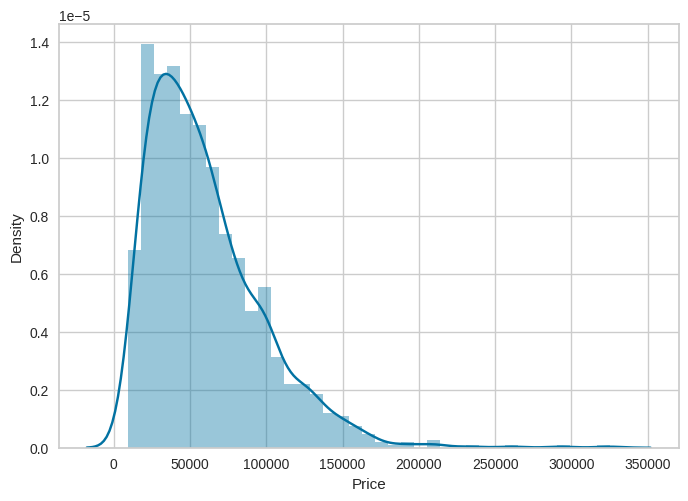

In [ ]:
# Let's explore the distribution of Laptop Price

sns.distplot(df["Price"])

This is a right-skewed distribution. We will have to use log transformation of price to make it at least roughly normally distributed prior to doing any predictions on it

<Axes: xlabel='Company'>

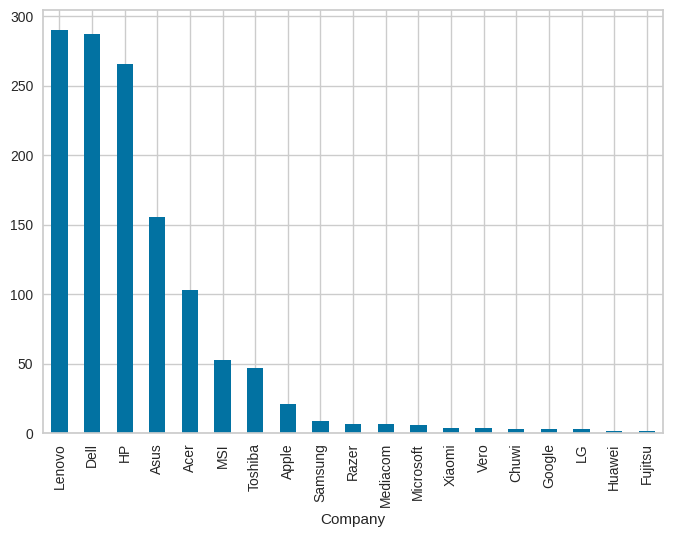

In [ ]:
# Exploring more on the laptop brands
df["Company"].value_counts().plot(kind="bar")

As evident, Lenovo, Dell and HP are the most common brands in the dataset, while LG, Huawei and Fujitsu are the least common brands

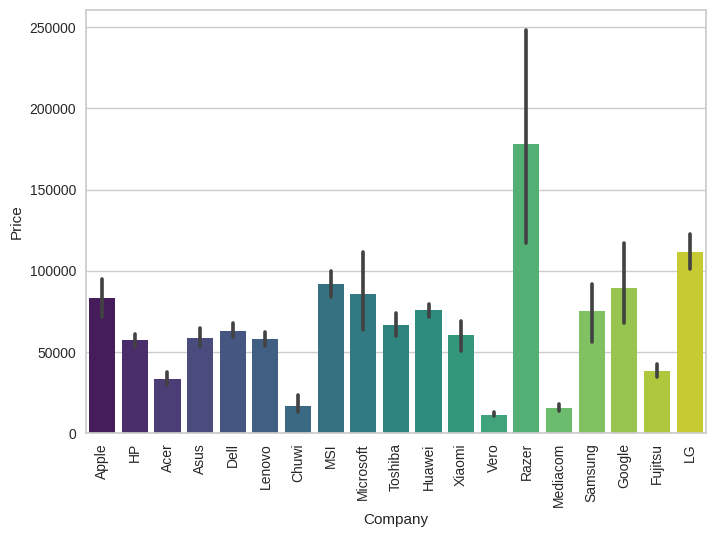

In [ ]:
# Exploring the dynamics of Brand Vs. Price

sns.barplot(x=df["Company"],y=df["Price"], palette="viridis")
plt.xticks(rotation="vertical")
plt.show()

From this we can observe that the brand called "Razer" demands the highest premium price for laptops, followed by LG and MSI, with Microsoft, Apple and Google not far behind. It is worth noting that LG and Razer do not have several models of laptops compared to other brands, which have more models and are priced relatively cheaper.

Thus it is evident that brand/company affects the price of the laptop

<Axes: xlabel='TypeName'>

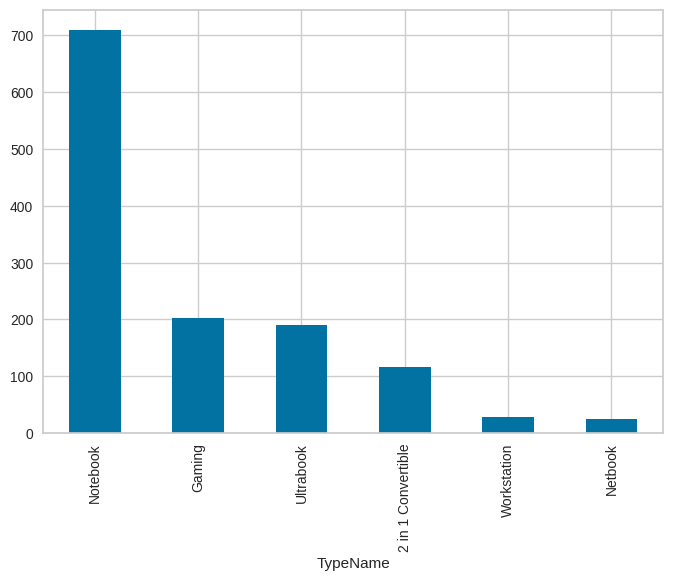

In [ ]:
# Let's explore more on the type of laptop

df["TypeName"].value_counts().plot(kind="bar")

Notebooks are the most prominent types of laptops, while netbooks are the least

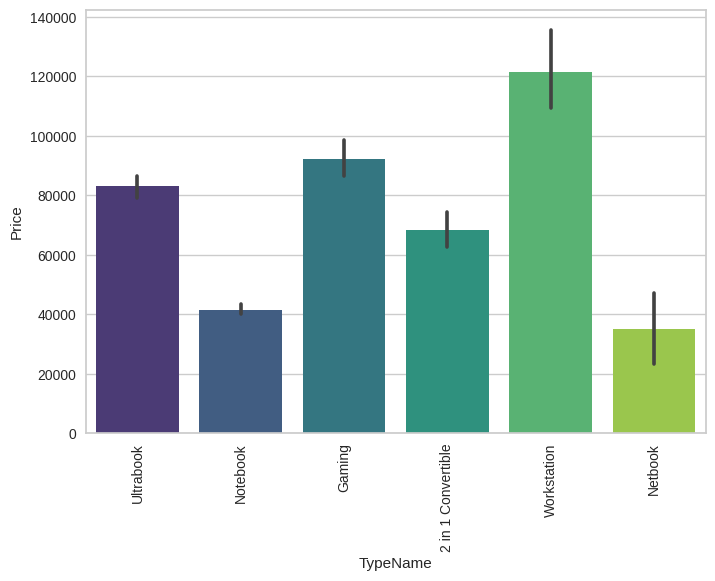

In [ ]:
# Exploring if type of laptop and price are correlated

sns.barplot(x=df["TypeName"], y=df["Price"], palette="viridis")
plt.xticks(rotation="vertical")
plt.show()

The Type of Laptop does seem to have an impact on the Price of the Laptop, with Workstations, Gaming Laptops and Ultrabooks demanding a premium price compared to other types of laptops

<Axes: ylabel='Density'>

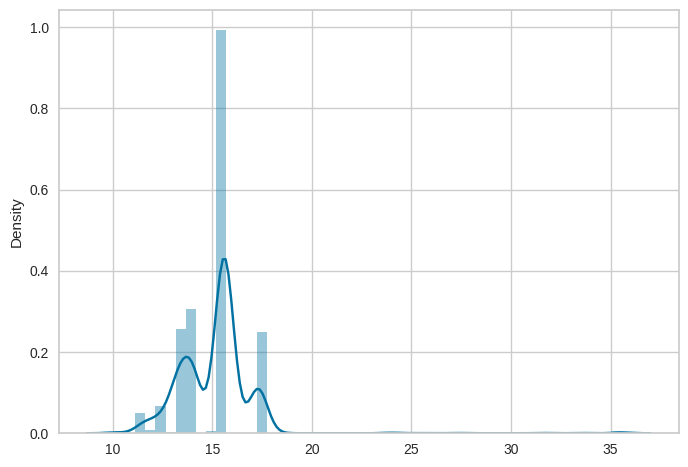

In [ ]:
# Let's explore the "Inches" column further

sns.distplot(x=df["Inches"])

Most of the laptops are 14 to 15 inches in size

<Axes: xlabel='Inches', ylabel='Price'>

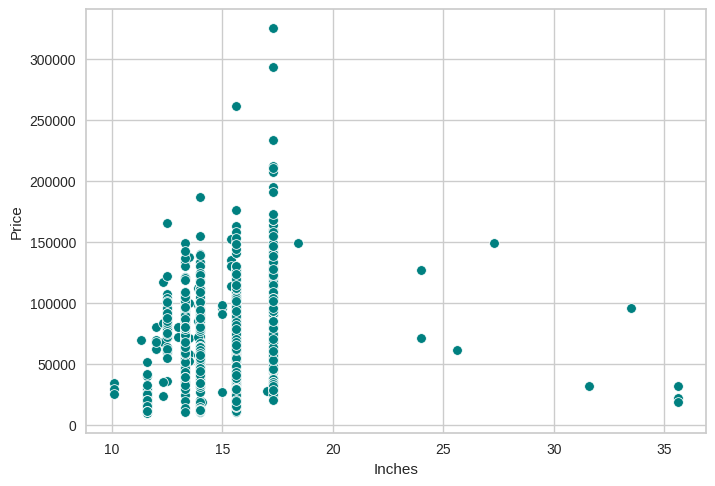

In [ ]:
# Exploring the correlation between Inches and Price
sns.scatterplot(x="Inches",y="Price",data=df,color="Teal")

There appears to be a correlation between Inches of the Laptop and the Price - Price increases as we go upwards of 10 inches, and then starkly drops once it crosses 17 inches screen size for the laptop.

In [ ]:
# Checking the value counts of ScreenResolution feature

df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

We will be Feature Engineering with this column to make it more robust and usable for prediction

In [ ]:
# Creating a new feature called "Touchscreen"

df["Touchscreen"] = df["ScreenResolution"].apply(lambda x : 1 if "Touchscreen" in x else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

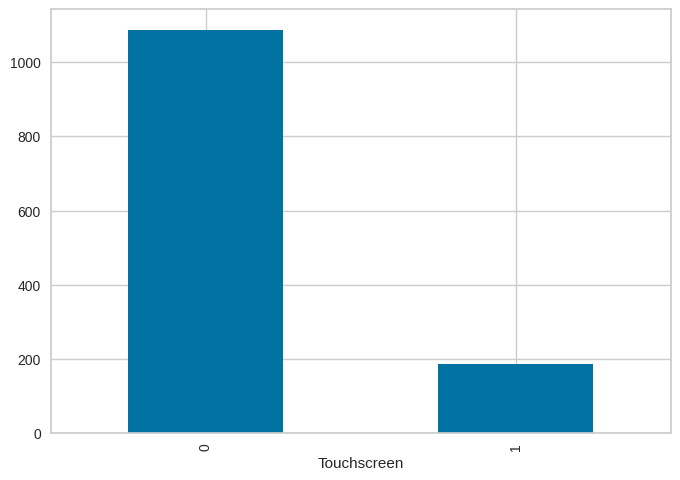

In [ ]:
# Now that we have the new column called "Touchscreen", we will check it's counts

df["Touchscreen"].value_counts().plot(kind="bar")

Touchscreens are a rarer variety of laptops in comparison to non-touchscreen laptops

<Axes: xlabel='Touchscreen', ylabel='Price'>

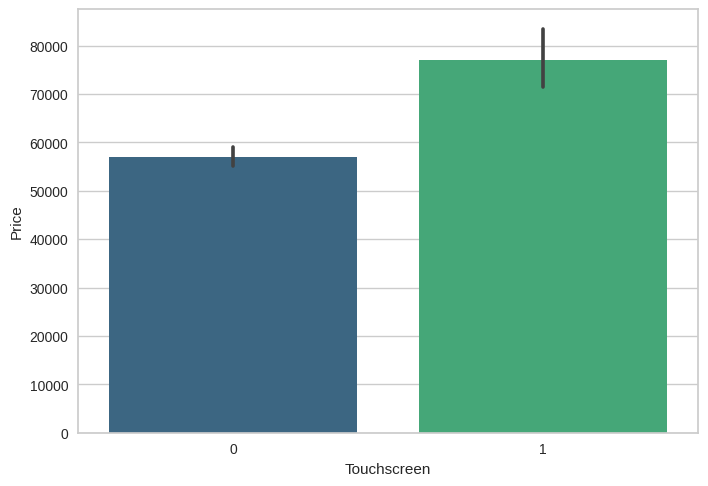

In [ ]:
# Exploring the relationship betweeen Touchscreen and Price

sns.barplot(x=df["Touchscreen"],y=df["Price"], palette="viridis")

Clearly, Touchscreens demand a higher price than non-touchscreen laptops. So there is an influence it has on the price of the laptop

Let's create a new column with IPS display from the ScreenResolution column, just like we did for Touchscreen

In [ ]:
# Creating a new column called "Ips"
df["Ips"] = df["ScreenResolution"].apply(lambda x : 1 if "IPS" in x else 0)

# Displaying the head of the data
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

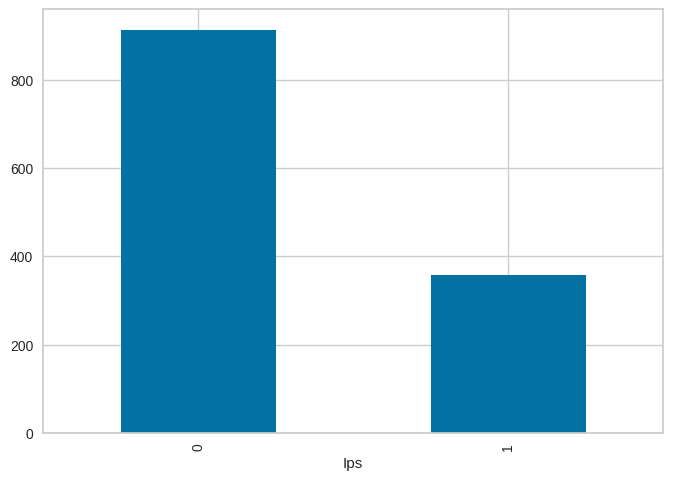

In [ ]:
# Now that we have the new column called "Ips", we will check it's counts

df["Ips"].value_counts().plot(kind="bar")

<Axes: xlabel='Ips', ylabel='Price'>

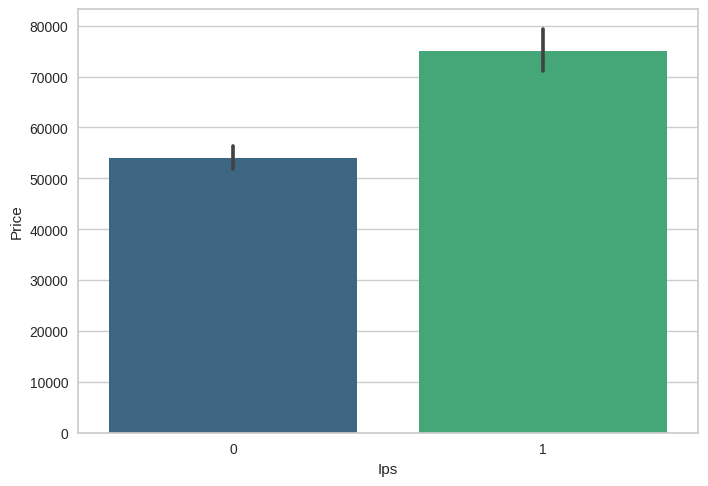

In [ ]:
# Let us check the correlation between IPS and Price

sns.barplot(x=df["Ips"],y=df["Price"],palette="viridis")

This shows that IPS display influences an increase in Price.

Now let's further play with the ScreenResolution feature to engineer it, and check for other trends, such as in X_resolution vs. Y_resolution

In [ ]:
df["ScreenResolution"].str.split("x")

0               [IPS Panel Retina Display 2560, 1600]
1                                         [1440, 900]
2                                [Full HD 1920, 1080]
3               [IPS Panel Retina Display 2880, 1800]
4               [IPS Panel Retina Display 2560, 1600]
                            ...                      
1298     [IPS Panel Full HD / Touchscreen 1920, 1080]
1299    [IPS Panel Quad HD+ / Touchscreen 3200, 1800]
1300                                      [1366, 768]
1301                                      [1366, 768]
1302                                      [1366, 768]
Name: ScreenResolution, Length: 1273, dtype: object

In [ ]:
# Creating a series of the split data

temp = df["ScreenResolution"].str.split("x",n=1,expand=True)

In [ ]:
temp

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [ ]:
# Now we will append both these columns 0 and 1 into the dataframe

df["X_res"]=temp[0]
df["Y_res"]=temp[1]

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
# Cleaning X_res further to get only the numbers

df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
# Converting X_res and Y_res to integer type
df["X_res"] = df["X_res"].astype("int")
df["Y_res"] = df["Y_res"].astype("int")

In [ ]:
# Checking the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int64  
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  Ips               1273 non-null   int64  
 13  X_res             1273 non-null   int64  
 14  Y_res             1273 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 159.1+ KB


In [ ]:
# Now we will check for data correlation with Price feature

# Selecting only the numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()["Price"]
print(correlation_matrix)

Inches         0.044681
Ram            0.685648
Weight         0.175928
Price          1.000000
Touchscreen    0.188994
Ips            0.254851
X_res          0.557556
Y_res          0.554069
Name: Price, dtype: float64


From this we can decipher that certain features don't have a major bearing on price of the laptop. But let's explore further by calculating the PPI of the laptop (Pixels Per Inch).

Formula: (((X_res)^2 + (Y_res)^2)^0.5/Inches)

In [ ]:
df['ppi'] = round((((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float'),2)

# Reconfiguring the correlation_matrix and checking it again:

# Selecting only the numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()["Price"]
print(correlation_matrix)

Inches         0.044681
Ram            0.685648
Weight         0.175928
Price          1.000000
Touchscreen    0.188994
Ips            0.254851
X_res          0.557556
Y_res          0.554069
ppi            0.469435
Name: Price, dtype: float64


PPI has limited correlation, less than moderate in fact.

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.68
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.21
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.53
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.98


In [ ]:
# We do not need the columns ScreenResolution, X_res, Y_res and Inches anymore since these are all accounted for in PPI, Touchscreen and IPS columns.
# Let us drop these columns now.

df.drop(columns=["ScreenResolution","X_res","Y_res","Inches"],inplace=True)

# Checking the head of the dataset
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98


Now we will move on to cleaning, EDA and Feature Engineering with the Cpu column

In [ ]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [ ]:
# Extracting the Cpu Name from the Cpu column and creating a separate feature
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5


In [ ]:
# Now we will create a function to extract just the "Processor" from this text in "Cpu Name" column.

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [ ]:
# Now let's apply this function to a engineer a new column "Cpu brand" by applying the function to "Cpu Name"

df["Cpu brand"] = df["Cpu Name"].apply(fetch_processor)

# Checking the head of the dataset to see the results
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

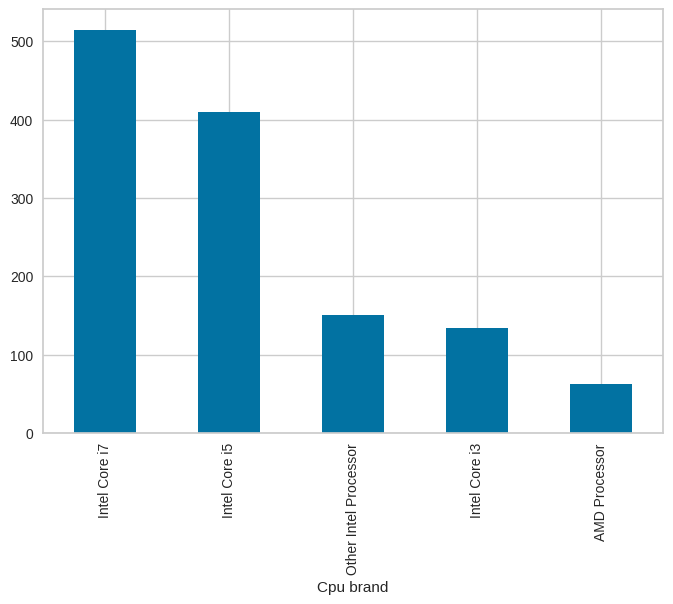

In [ ]:
# Now let's check the value count of Cpu brand column

df['Cpu brand'].value_counts().plot(kind='bar')

Clearly, Intel Core processors are the largest in number, while AMD is the lowest

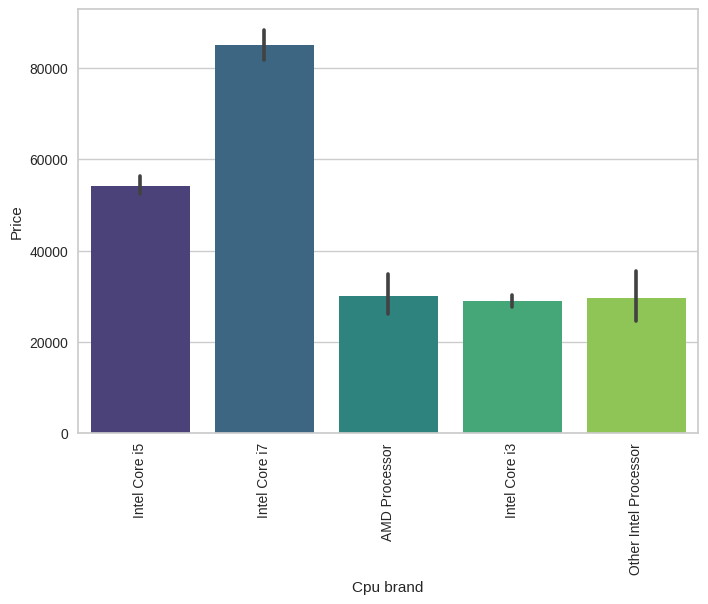

In [ ]:
# Let's check for any relation between Cpu Brand and Price

sns.barplot(x=df['Cpu brand'],y=df['Price'], palette="viridis")
plt.xticks(rotation='vertical')
plt.show()

Intel Core i7 models are costliest followed by Core i5, and then others are largely lower priced and on par with each other

In [ ]:
# We do not need Cpu Name and Cpu Columns anymore since we have extracted Cpu Brand successfully with the function
# Lets drop the Cpu and Cpu Name columns

df.drop(columns=["Cpu","Cpu Name"], inplace=True)

# Checking the head of the dataset
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5


<Axes: xlabel='Ram'>

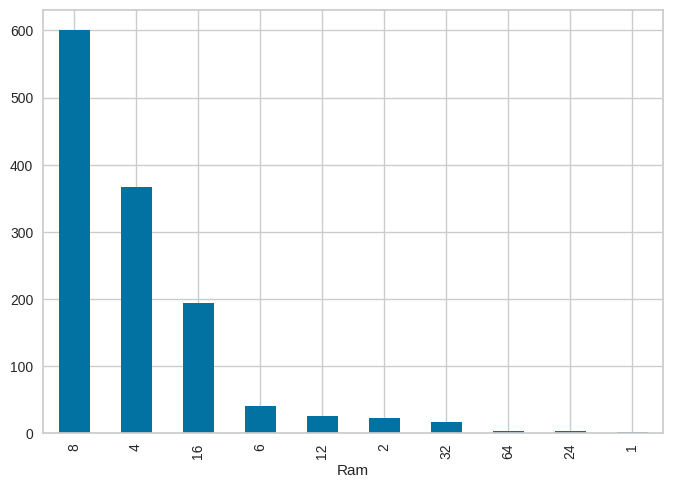

In [ ]:
# Now let's check the Ram column of the dataset

df["Ram"].value_counts().plot(kind="bar")

Appears that 8, 4 and 16 GB RAMs are the most dominant

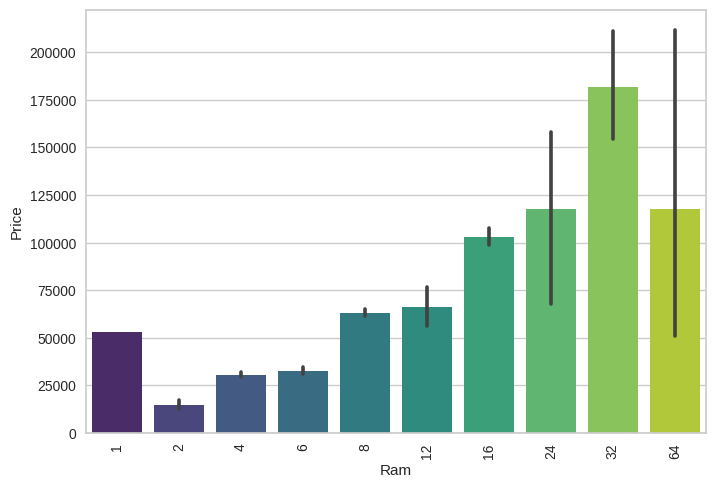

In [ ]:
# Checking the relationship between RAM and Price

sns.barplot(x=df['Ram'],y=df['Price'],palette="viridis")
plt.xticks(rotation='vertical')
plt.show()

From this dataset, we can observe that 32GB RAM are the costliest, followed by 24GB and 64GB RAMS. It is worth noting that 64GB RAMs are not common in the dataset.

In [ ]:
# Let's check the Memory column now

df["Memory"].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
128GB Flash Storage                4
180GB SSD                          4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

This column needs a lot of cleaning and engineering. Let's work on that.

In [ ]:
# Convert 'Memory' column to string and clean it up
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split the 'Memory' column on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Create and clean 'first' and 'second' columns
df["first"] = new[0]
df["first"] = df["first"].str.strip()
df["second"] = new[1]

# Identify storage types in 'first' column
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'first'
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Handle empty strings in 'first' by replacing them with '0'
df['first'] = df['first'].replace('', '0')

# Handle missing values in 'second' column
df["second"].fillna("0", inplace=True)

# Identify storage types in 'second' column
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Remove non-numeric characters from 'second'
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# Handle empty strings in 'second' by replacing them with '0'
df['second'] = df['second'].replace('', '0')

# Convert 'first' and 'second' to integers
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

# Calculate total storage for each type
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [ ]:
# Displaying the head of the dataset to check the results:

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,0,256,0,0


In [ ]:
# We don't need the memory column anymore so we will drop that column
df.drop(columns=["Memory"],inplace=True)

df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,0,256,0,0


In [ ]:
# Let us reconfigure the correlation_matrix variable and check it again

# Selecting only the numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()["Price"]
print(correlation_matrix)

Ram              0.685648
Weight           0.175928
Price            1.000000
Touchscreen      0.188994
Ips              0.254851
ppi              0.469435
HDD             -0.095394
SSD              0.668416
Hybrid           0.007843
Flash_Storage   -0.038332
Name: Price, dtype: float64


In [ ]:
# There seems to be no correlation between price and hybrid/flash storage. Let's drop these columns

df.drop(columns=["Hybrid","Flash_Storage"], inplace=True)

# Checking the head of the dataset
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,0,256


Now, let's work with the Gpu column. We will clean, do EDA and engineer the column for better use

In [ ]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [ ]:
# There are too many brands. Let's just split the column to a new feature "Gpu brand" and then check how things look

df["Gpu brand"] = df["Gpu"].apply(lambda x : x.split()[0])

# Checking the head of the dataset as usual to see results
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,0,256,Intel


In [ ]:
# Now that we have the brands extracted into the new column Gpu brand, let's check the value counts

df["Gpu brand"].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

<Axes: xlabel='Gpu brand'>

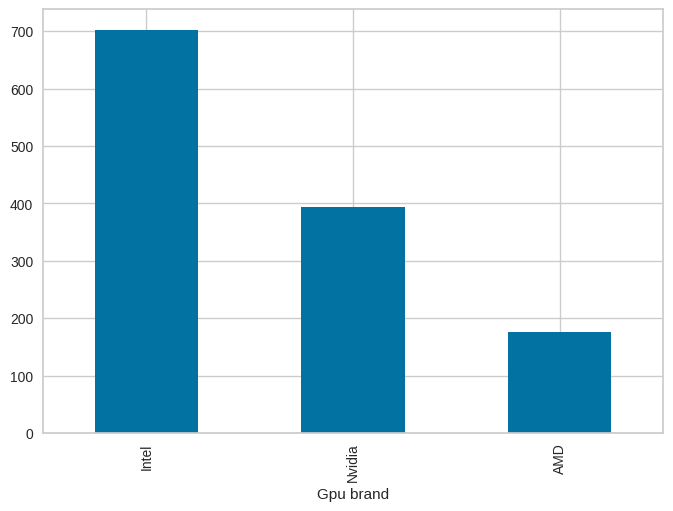

In [ ]:
# Since there is only one entry with ARM, let's remove this outlier
df = df[df['Gpu brand'] != 'ARM']

# And then recheck the value_counts
df["Gpu brand"].value_counts().plot(kind="bar")

<Axes: xlabel='Gpu brand'>

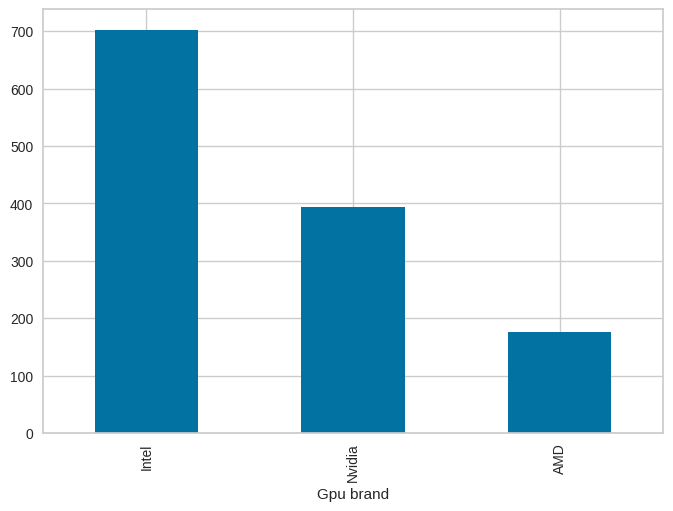

In [ ]:
df["Gpu brand"].value_counts().plot(kind="bar")

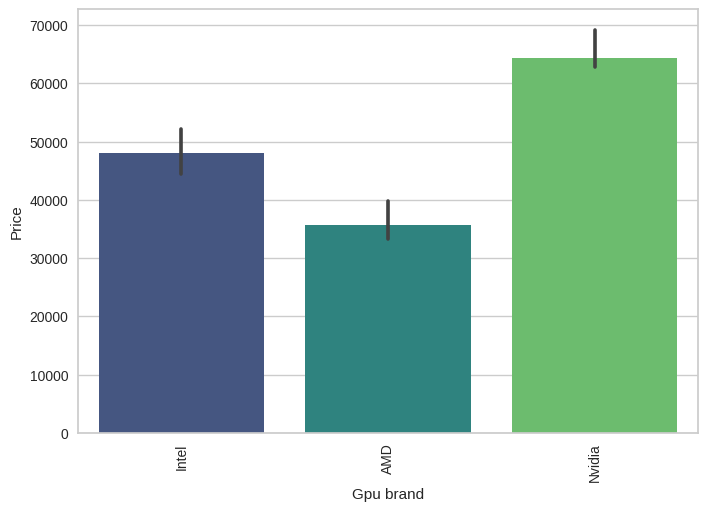

In [ ]:
# Let's check a barplot to examine the median price of each Gpu brand

sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median, palette="viridis")
plt.xticks(rotation='vertical')
plt.show()

Nvidia has the highest median price, followed by Intel and then AMD.

It appears that brand of Gpu impacts the price in some way

In [ ]:
# We do not need the Gpu column anymore so let's drop it

df.drop(columns=["Gpu"], inplace=True)

# Checking the resultant head of the dataset
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,0,256,Intel


In [ ]:
# Our next column is OpSys, which we will check for value counts
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

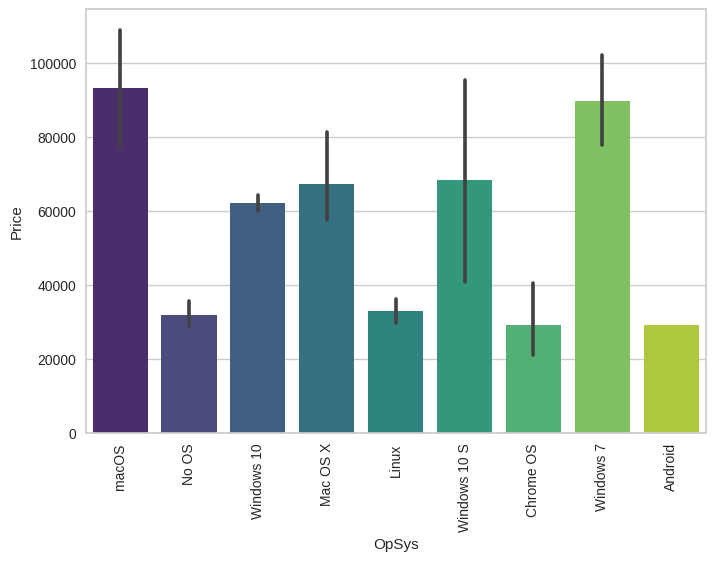

In [ ]:
# Checking Price vs. OpSys for correlations

sns.barplot(x=df['OpSys'],y=df['Price'], palette="viridis")
plt.xticks(rotation='vertical')
plt.show()

macOS and Windows 7 seem to be costliest in terms of price. It appears like OpSys has an impact on Price.

In [ ]:
# Let us categorize the OS properly so that we can feature engineer a column that will predict this trend better
# For this we will create a funtion that will help us categorize the OS properly

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
# Let's apply this function to the OpSys feature and generate a new feature

df['OS'] = df['OpSys'].apply(cat_os)

# Checking the head of the dataset
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='OS'>

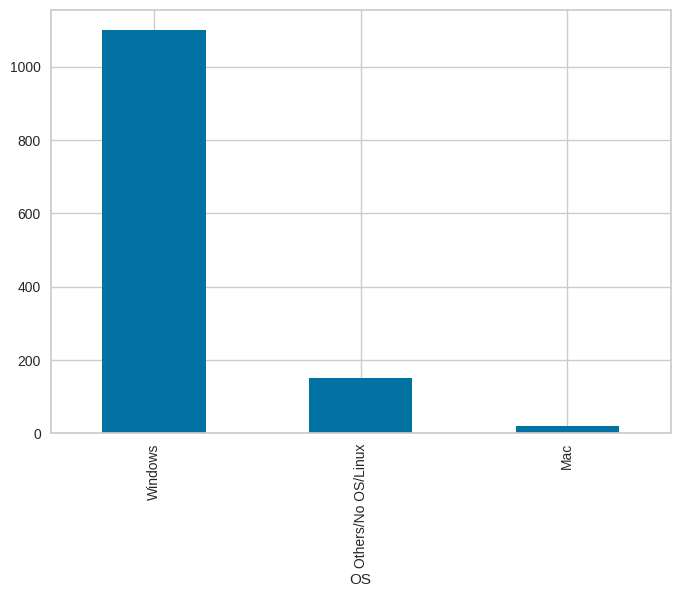

In [ ]:
# Since this was successful, let's check the barplot of value counts of OS

df["OS"].value_counts().plot(kind="bar")

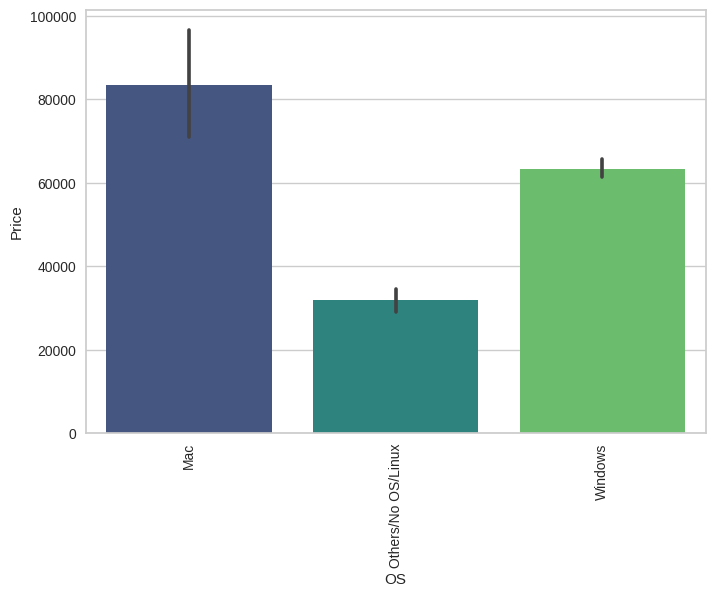

In [ ]:
# Let's check the barplot for Price vs. OS

sns.barplot(x=df['OS'],y=df['Price'], palette="viridis")
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# We can drop the OpSys column now since we have a better predictor feature

df.drop(columns=["OpSys"],inplace=True)

# Checking the head of the dataset
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.98,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.68,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.21,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.53,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.98,Intel Core i5,0,256,Intel,Mac


Now let's move to the next column - Weight. We will check if this needs to be cleaned, any EDA or feature engineering required.

<Axes: xlabel='Weight', ylabel='Density'>

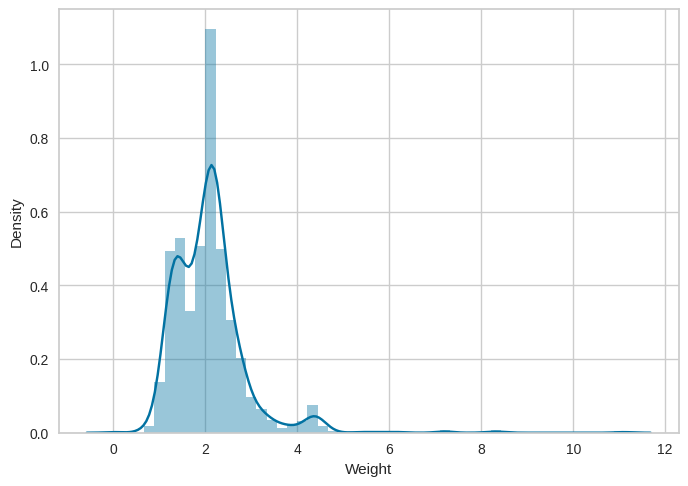

In [ ]:
sns.distplot(df["Weight"])

<Axes: xlabel='Weight', ylabel='Price'>

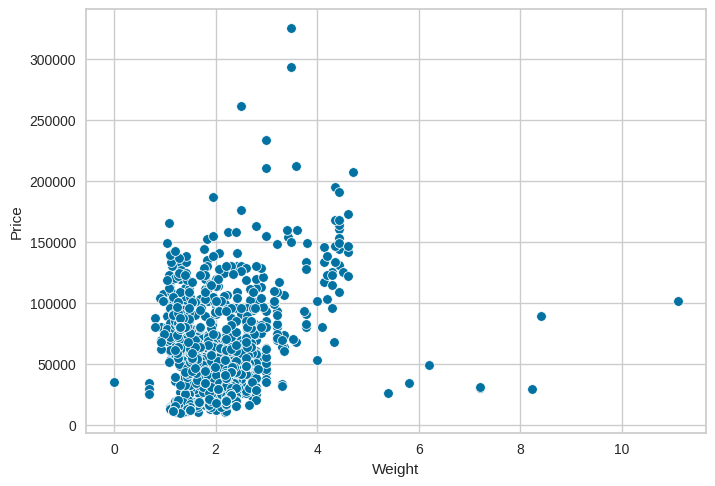

In [ ]:
# Checking relationships between Price and Weight

sns.scatterplot(x=df['Weight'],y=df['Price'],palette="viridis")

There does not appear to be a lot of correlation between Weight and Price. But let's reconfirm by checking the correlation_matrix variable.

In [ ]:
# Let us reconfigure the correlation_matrix variable and check it again

# Selecting only the numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()["Price"]
print(correlation_matrix)

Ram            0.685521
Weight         0.175448
Price          1.000000
Touchscreen    0.190738
Ips            0.255987
ppi            0.471353
HDD           -0.095855
SSD            0.668271
Name: Price, dtype: float64


In [ ]:
# Checking the info of the dataset just to reconfirm things before feature encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1272 non-null   object 
 1   TypeName     1272 non-null   object 
 2   Ram          1272 non-null   int64  
 3   Weight       1271 non-null   float64
 4   Price        1272 non-null   float64
 5   Touchscreen  1272 non-null   int64  
 6   Ips          1272 non-null   int64  
 7   ppi          1271 non-null   float64
 8   Cpu brand    1272 non-null   object 
 9   HDD          1272 non-null   int64  
 10  SSD          1272 non-null   int64  
 11  Gpu brand    1272 non-null   object 
 12  OS           1272 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 139.1+ KB


NOTE: Since the Price column was highly right-skewed when observed before in the distribution plot, let us use the natural logarithmic transformation (base e) of the Price feature, to make this more of a normal distribution and deal with the data better. This will show the frequency / density of different logarithmic price values.

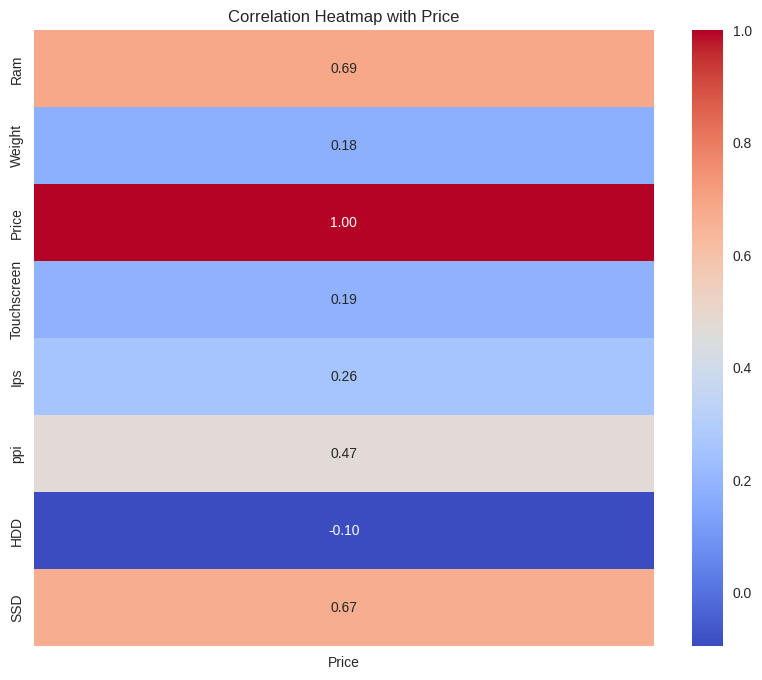

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap with Price')
plt.show()

From the above matrix we can understand that RAM, SSD and to some extent PPI have a strong effect on the Price of the Laptop. Higher the RAM and SSD, the higher the Price of the laptop and vice versa.

In comparison, Weight, Touchscreen, IPS display do not have such an impact.

HDD has a mildly negative correlation, which means that it makes the price of the laptop come down in case there is an HDD in the laptop.

<Axes: xlabel='Price', ylabel='Density'>

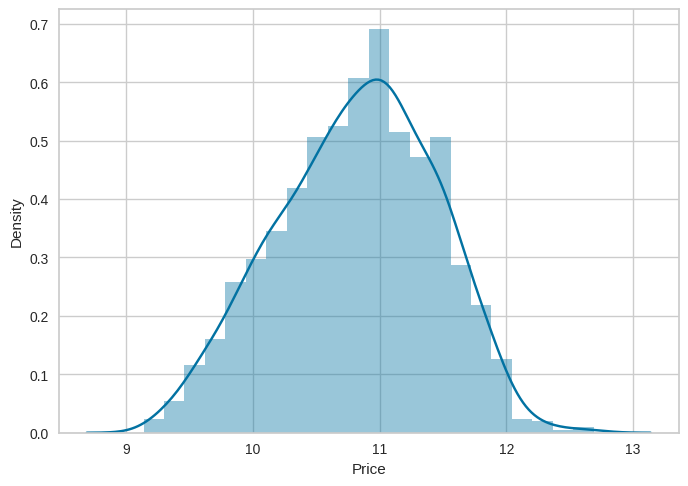

In [ ]:
# Checking the distribution of log price values of laptops

sns.distplot(np.log(df["Price"]))

Let's find the final rows with Missing Values and note their indices, since we will be using KNN or MICE imputation to fill these rows post One Hot Encoding, in the pipeline we will create during Model Selection process

In [ ]:
rows_with_missing_values = df[df.isnull().any(axis=1)].index
print("Rows with missing values (indices): ", rows_with_missing_values)
print("\n")
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: ", columns_with_missing_values)
print("\n")
print(df.isnull().sum())
print("\n")

Rows with missing values (indices):  Index([208, 476], dtype='int64')


Columns with missing values:  ['Weight', 'ppi']


Company        0
TypeName       0
Ram            0
Weight         1
Price          0
Touchscreen    0
Ips            0
ppi            1
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
OS             0
dtype: int64




# Model Selection

In [ ]:
# We will now split the dataframe into Independent variables (X) and Dependent/Target Variable (y)

X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
# Checking the Independent variables dataframe
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.98,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.68,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.21,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.53,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.98,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.35,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.05,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.94,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.45,Intel Core i7,1000,0,AMD,Windows


In [ ]:
# Checking the dependent variable dataframe.
# Note that we will be using the log of price values for better model predictions
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1272, dtype: float64

In [ ]:
# Train, Test, Split the X and y variables.
# We will keep 15% of the dataset for testing purposes, and the rest for training

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [ ]:
# Importing the necessary classes

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Importing the required classes from sklearn, svm and xgboost for model training

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear Regression

We will be trying Linear Regression with L1 (Lasso) Regression for Regularization

In [ ]:
# Define the categorical columns by their names
categorical_columns = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'OS']

# Define the numeric columns (for imputation) by their names
numeric_columns_for_imputation = ['Weight', 'ppi']

# Step 1: Define a ColumnTransformer for preprocessing, including KNN imputation
step1 = ColumnTransformer(transformers=[
    # Apply OneHotEncoder to selected categorical columns
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns),
    # Apply KNN imputation to handle missing values in remaining numeric columns
    ('imputer', KNNImputer(n_neighbors=5), numeric_columns_for_imputation)
], remainder='passthrough')

# Step 2: Define a Lasso regression model
step2 = Lasso(alpha=0.001)

# Step 3: Create a Pipeline with preprocessing and model steps
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing steps
    ('step2', step2)   # Apply Lasso regression model
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Predict the target variable using the fitted pipeline on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print rounded values of performance metrics
print("Linear Lasso Regression Model")
print('R2 score:', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))
print('RMSE:', round(rmse, 3))

Linear Lasso Regression Model
R2 score: 0.817
MAE: 0.205
MSE: 0.069
RMSE: 0.262


# KNN Regression

We will be trying out K-Nearest Neighbors to check how that model performs

In [ ]:
# Step 1: Define a ColumnTransformer for preprocessing, including KNN imputation
step1 = ColumnTransformer(transformers=[
    # Apply OneHotEncoder to selected categorical columns
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns),
    # Apply KNN imputation to handle missing values in remaining numeric columns
    ('imputer', KNNImputer(n_neighbors=5), numeric_columns_for_imputation)
], remainder='passthrough')

# Step 2: Define the KNN regression model
step2 = KNeighborsRegressor(n_neighbors=3)

# Step 3: Create a Pipeline with preprocessing and model steps
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing steps
    ('step2', step2)   # Apply KNN regression model
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Predict the target variable using the fitted pipeline on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print rounded values of performance metrics
print("KNN Regression Model")
print('R2 score:', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))
print('RMSE:', round(rmse, 3))

KNN Regression Model
R2 score: 0.779
MAE: 0.217
MSE: 0.083
RMSE: 0.288


# Decision Tree Regression

We will be trying out Decision Tree Regressor to check how this model compares with the rest we have tried

In [ ]:
# Step 1: Define a ColumnTransformer for preprocessing, including KNN imputation
step1 = ColumnTransformer(transformers=[
    # Apply OneHotEncoder to selected categorical columns
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns),
    # Apply KNN imputation to handle missing values in remaining numeric columns
    ('imputer', KNNImputer(n_neighbors=5), numeric_columns_for_imputation)
], remainder='passthrough')

# Step 2: Define the Decision Tree regression model
step2 = DecisionTreeRegressor(max_depth=8)

# Step 3: Create a Pipeline with preprocessing and model steps
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing steps
    ('step2', step2)   # Apply Decision Tree regression model
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Predict the target variable using the fitted pipeline on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print rounded values of performance metrics
print("Decision Tree Regression Model")
print('R2 score:', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))
print('RMSE:', round(rmse, 3))

Decision Tree Regression Model
R2 score: 0.831
MAE: 0.189
MSE: 0.063
RMSE: 0.252


# Random Forest Regression

Now, we will try out Random Forest Regressor to check how this model performs compared to the rest

In [ ]:
# Step 1: Define a ColumnTransformer for preprocessing, including KNN imputation
step1 = ColumnTransformer(transformers=[
    # Apply OneHotEncoder to selected categorical columns
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns),
    # Apply KNN imputation to handle missing values in remaining numeric columns
    ('imputer', KNNImputer(n_neighbors=5), numeric_columns_for_imputation)
], remainder='passthrough')

# Step 2: Define the Random Forest regression model
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Step 3: Create a Pipeline with preprocessing and model steps
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing steps
    ('step2', step2)   # Apply Random Forest regression model
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Predict the target variable using the fitted pipeline on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print rounded values of performance metrics
print("Random Forest Regression Model")
print('R2 score:', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))
print('RMSE:', round(rmse, 3))

Random Forest Regression Model
R2 score: 0.886
MAE: 0.158
MSE: 0.043
RMSE: 0.207


# SVM Regression

Random Forest did better than the rest, but we will check how SVM performs as well

In [ ]:
# Step 1: Define a ColumnTransformer for preprocessing, including KNN imputation
step1 = ColumnTransformer(transformers=[
    # Apply OneHotEncoder to selected categorical columns
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns),
    # Apply KNN imputation to handle missing values in remaining numeric columns
    ('imputer', KNNImputer(n_neighbors=5), numeric_columns_for_imputation)
], remainder='passthrough')

# Step 2: Define the SVM regression model
step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

# Step 3: Create a Pipeline with preprocessing and model steps
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing steps
    ('step2', step2)   # Apply SVM regression model
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Predict the target variable using the fitted pipeline on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print rounded values of performance metrics
print("Support Vector Regression Model")
print('R2 score:', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))
print('RMSE:', round(rmse, 3))

Support Vector Regression Model
R2 score: 0.834
MAE: 0.195
MSE: 0.062
RMSE: 0.25


# Observations

Of all the 5 different models tried and tested, Random Forest Regressor gave us the best results.
The model is not an overfit or an underfit - it gives us the best fit and reliability in terms of predictability.
The R^2 scores are optimal and the best of the lot, as the model accounts for 88% of the errors and can give that much accuracy in predictions, along with providing a good generalisation for new data points.
MAE, MSE and RMSE are also low, which is a good indication that this provides us the best fit regression model for our dataset.
We do not need to do any fine-tuning of hyperparameters since this is giving us a rather decent best-fit regression model for our dataset.
Therefore, we can go ahead with Random Forest Regressor.

***Random Forest Regression Model*** |
**R2 score:** 0.886 |
**MAE:** 0.158 |
**MSE:** 0.043 |
**RMSE:** 0.207 |

# Residual Analysis (RF Regressor)

In [ ]:
# Resetting all the variables to our final selected model - Random Forest Regressor

# Step 1: Define a ColumnTransformer for preprocessing, including KNN imputation
step1 = ColumnTransformer(transformers=[
    # Apply OneHotEncoder to selected categorical columns
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns),
    # Apply KNN imputation to handle missing values in remaining numeric columns
    ('imputer', KNNImputer(n_neighbors=5), numeric_columns_for_imputation)
], remainder='passthrough')

# Step 2: Define the Random Forest regression model
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Step 3: Create a Pipeline with preprocessing and model steps
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing steps
    ('step2', step2)   # Apply Random Forest regression model
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Predict the target variable using the fitted pipeline on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print rounded values of performance metrics
print("Random Forest Regression Model")
print('R2 score:', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))
print('RMSE:', round(rmse, 3))

Random Forest Regression Model
R2 score: 0.886
MAE: 0.158
MSE: 0.043
RMSE: 0.207


In [ ]:
%%capture
pip install yellowbrick

In [ ]:
# Importing ResidualsPlot from yellowbrick
from yellowbrick.regressor import ResidualsPlot

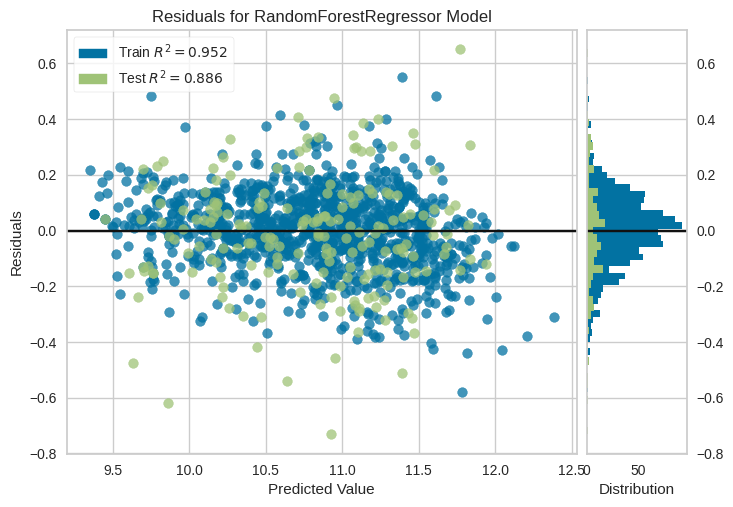

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# Checking the Residuals Plot for RF Regressor

visualizer=ResidualsPlot(pipe)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Comparing R2 Score for Train and Test, we find the training R2 score is better than the testing R2 score, which is a good sign. This model is neither an overfit nor an underfit - it is the best fit.

The plot also shows a well-tuned distribution of predicted vs. actual values.

# Laptop Price Prediction | Streamlit App

In this section, we will be creating a user interface with the help of Streamlit to enable SmartTech Co. to predict the laptop's price by plugging in the specifications of the laptop.

Streamlit is an open-source library that helps create such webapps, that can also be deployed on specific URLs and accessed real-time by companies.

***The app will be separate from this colab file. Please refer to the attached PPT and other files included in this zip folder to see the code and other details of the app.***

In [ ]:
# Reiterating Random Forest Regressor Model here to reset all the variables correctly

# Step 1: Define a ColumnTransformer for preprocessing, including KNN imputation
step1 = ColumnTransformer(transformers=[
    # Apply OneHotEncoder to selected categorical columns
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_columns),
    # Apply KNN imputation to handle missing values in remaining numeric columns
    ('imputer', KNNImputer(n_neighbors=5), numeric_columns_for_imputation)
], remainder='passthrough')

# Step 2: Define the Random Forest regression model
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Step 3: Create a Pipeline with preprocessing and model steps
pipe = Pipeline([
    ('step1', step1),  # Apply preprocessing steps
    ('step2', step2)   # Apply Random Forest regression model
])

# Step 4: Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Step 5: Predict the target variable using the fitted pipeline on the test data
y_pred = pipe.predict(X_test)

# Step 6: Evaluate the model's performance on the test set
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print rounded values of performance metrics
print("Random Forest Regression Model")
print('R2 score:', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))
print('RMSE:', round(rmse, 3))

Random Forest Regression Model
R2 score: 0.886
MAE: 0.158
MSE: 0.043
RMSE: 0.207


In [265]:
import joblib

# Creating a pickle file with joblib
joblib.dump(pipe, 'pipeline.pkl')

['pipeline.pkl']

In [267]:
import shutil
shutil.copy("pipeline.pkl", "/content/drive/MyDrive/")

'/content/drive/MyDrive/pipeline.pkl'

In [268]:
from google.colab import files
files.download("pipeline.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install scikit-learn

In [ ]:
!python --version

Python 3.10.12


In [269]:
# Exporting the final dataframe for use in the app

df.to_csv('final_dataframe.csv', index=False)

In [263]:
from google.colab import files
files.download('final_dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>